## Introduction

This notebook contains basics descriptive and inferential statistics using R and follows the pedagogy of the **Practical time series analysis from Coursera** and few other sources. This is the _second part_ of the series.

### Objective:
1. Time-series via time plot
2. Stationarity, ACFs
3. Random Walk
4. Moving Averages

<h2><center>1. Time Series Data</center></h2>
___
- Time series is a data collected through time
- Sampling adjacent points in time introduces a correlation into the system. The classical statistical inference would not work
- Examples include- economic and financial time series, marketing, demographic time series

### Loading a time series data

JJ dataset: Contains data for Johnsons and Johnsons - Quaterly earnings from 1960 to 1980(84 quarters)

In [2]:
install.packages('astsa')
require(astsa)
help(jj)

Warning message:
"package 'astsa' is in use and will not be installed"

### Plotting the time series data

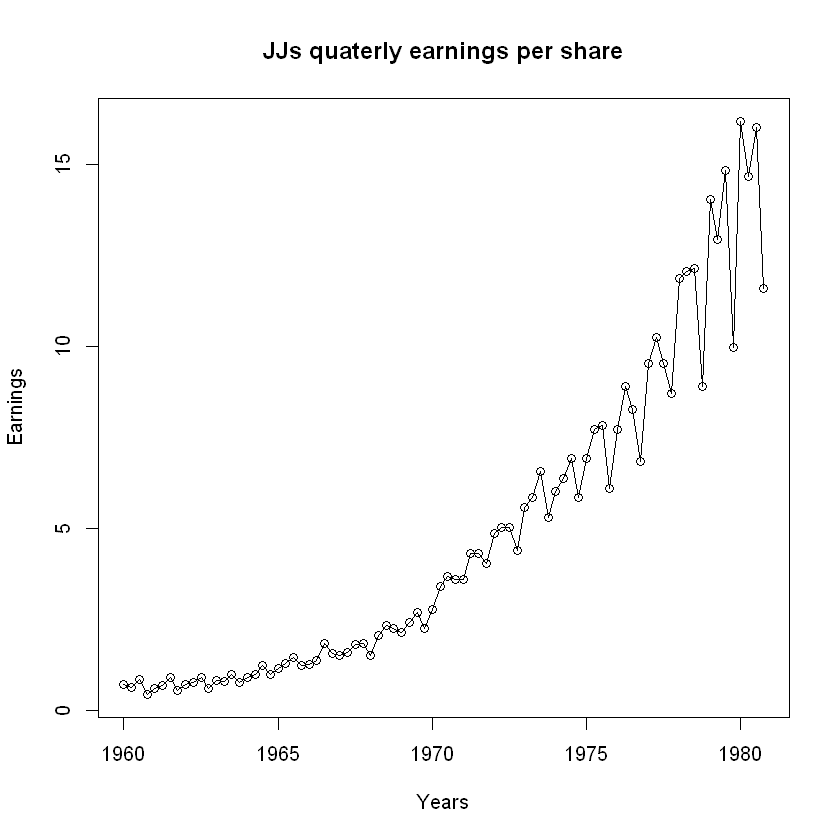

In [3]:
par(mfrow =c(1,1))
plot(jj, type= 'o', main= 'JJs quaterly earnings per share', ylab ='Earnings', xlab ='Years')
## type - o means that every point will have a circle on it


There is a obvious trend in the data; it's increasing through the years. Apart from the trend, there are also some fluctuations, the seasonal variations on that trend. So there is a seasonal effect on the data

<h2><center>2. Stationarity and ACFs</center></h2>
___
### Stationarity
Stationary time series is what we're going to be building our modules on and we want our time series to be stationary. These are the ones where there is:
- No systematic change in the mean i.e., no trend in the time plot
- No systematic change in the variation
- No periodic fluctuations as well

Thus we want that one section of the data in time series are much like the properties of the other sections of the data

For a **non-stationary** time series, we will do some transformations to get stationary time series


### Random Variable
This is a function that goes from sample space to real numbers _X:S-->R_<br>
Where sample space are the number of possible outcomes of the experiment and if we map each possible outcome to the experiment to the number in the real line, we get random variables.
We can think of it as a box generating random numbers from a dataset. If we know the distribution of the random variable, we can tell something about the dataset

They can be **discrete** or **continuous**

### Covariance
It measures the linear dependence between two random variables.<br>
If X,Y are two random variables, then 

**Cov(X,Y) = E[(X-$\mu_x$)(Y-$\mu_y$)]**


### Stochastic Process
- Collection of random variables
- If we take random variables say X1, X2, X3 and give them a sequence in time 1,2,3 respectively, then we have a stochastic process

** $X_t$ ~ distribution($\mu_t$,$\sigma^2$)**

- Unlike a deterministic process, we have a randomness at every step
- Time series can be thought of as a realization of a stochastic process.

### Autocovariance Function
It is defined as taking the covariance of different elements in our stochatic process.<br>

>$\gamma(s,t) = Cov(X_s, X_t) = E[(X_s -\mu_s)(X_t - \mu_t)]$<br>
>$\gamma(t,t) = Cov(X_t, X_t) = E[(X_t -\mu_t)^2] = Var(X_t) = \sigma^2$

Covariance of t with itself gives us variance at that time step

So gamma is the Autocovariance function and it depends on the **time difference(k)** between the random variables and the reason is that we are working with a stationary time series data.<br>
_Note: $\gamma_k = c_k$ is known as the autocovariance coefficient_

>$\gamma_k  = \gamma(t,t+k) ~ c_k$


### Autocovariance Coefficients
For a stationary process, gamma depends on k. $c_k$ is called the **autocovariance coefficient**<br> 
In case of paired datasets(x1,y1),(x2,y2) 

>** $S_{xy} = \frac{\sum(x_t - \mu_x)(y_t - \mu_y)}{(N -1)}$**
 

In R we can call **cov** function to calculate the covariance between the paired dataset


Autocovariance coefficients at different lags<br>
>** $\gamma_k = Cov(X_t, X_{t+k})$ **

where $C_k$ is an estimation of $\gamma_k$



Autocovariances of series 'random_process', by lag

      0       1       2       3       4       5       6       7       8       9 
 0.9822 -0.1811  0.0341 -0.0822  0.0295  0.1494  0.0650 -0.0534 -0.0302  0.0739 
     10      11      12      13      14      15      16      17      18      19 
-0.1098  0.0567 -0.1535  0.0851  0.0048  0.1612 -0.1718 -0.0488  0.0116  0.0468 
     20 
 0.1260 


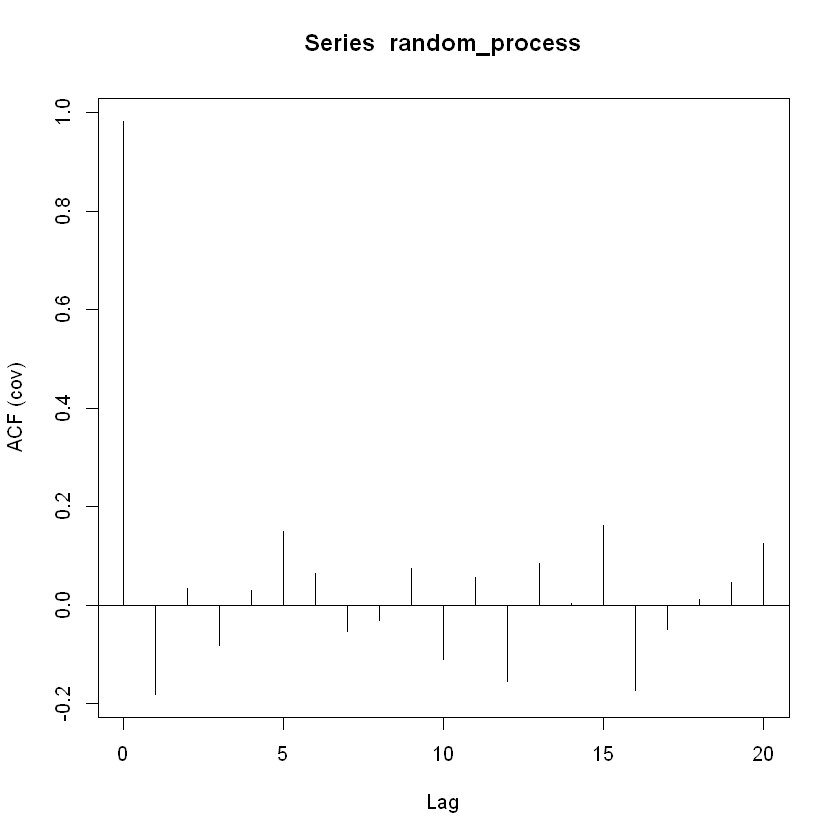

In [6]:
## we generate a random time series from a normal dist
random_process = ts(rnorm(100))

print (acf (random_process, type = 'covariance'))

This gives us the autocovariance coefficients for the timeseries at different lags.


### Autocorrelation Function (ACF)

- We assume weak stationarity ( no change in mean/variance)
- The autocorrelation coefficient between $X_t$ and $X_{t+k}$ is defined as :
> ** -1 <= $\rho_k = \frac {\gamma_k}{\gamma_0}$ <= 1**


_where $\gamma_k$ is the autocovariance coefficient at lag k and $\gamma_0$ at lag 0_

- **acf** routine plots the correlogram i,e autocorrelation coefficients at different lags
- it always starts with 1 as $c_0/c_0$ = 1


Autocorrelations of series 'random_process', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000 -0.045 -0.165  0.121  0.027 -0.132 -0.187 -0.047 -0.072  0.006 -0.039 
    11     12     13     14     15     16     17     18     19     20 
 0.227  0.085  0.005  0.035  0.047  0.060 -0.229 -0.162 -0.050 -0.021 

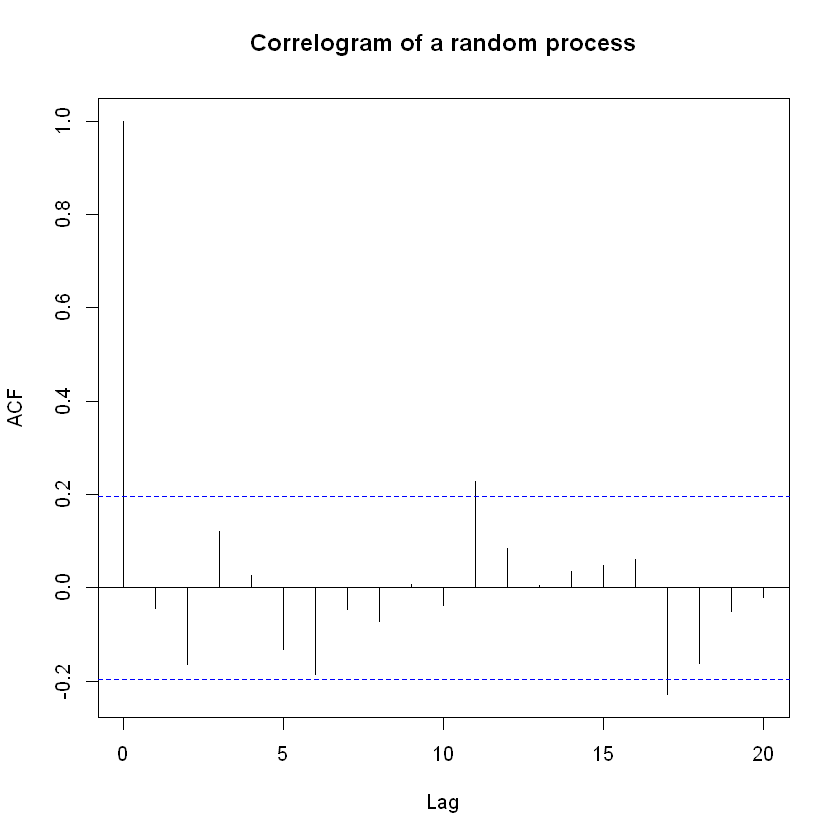

In [5]:
par(mfrow= c(1,1))
random_process = ts(rnorm(100))
(acf(random_process, main ="Correlogram of a random process"))

This shows that there are no significant correlation at different lags for the time series as we produced the data from a random normal distribution. The blue dotted lines represent the significant levels for the ACF plot.

<h2><center>3. Random Walk</center></h2>
___

A simple random walk can be modeled as : <br>
> $X_t = X_{t-1} + Z_t$<br>

where $X_t$ is the location at time t(price of stock today)<br>
$X_{t-1}$ is the location at time t-1 (price of stock yesterday)<br>
and $Z_t$ is white noise, which is a standard normal distribution (Normal($\mu,\sigma^2$))<br>

So, as we keep replacing $X_{t-1}$ with $X_{t-2}$ and so on , we find that $X_t$ is the sum of all random noises

> $X_t = \sum{Z_t}$<br>
> $E[X_t] = \mu t$<br>
> $Var[X_t] = \sigma^2t$

The expectation and variance are dependent on t and thus random walk is **not a stationary process**.

### Generating a random model

In [ ]:
x = NULL
x[1] = 0
for (i in 2:1000){
    x[i] = x[i-1] + rnorm(1)
}
random_walk = ts(x)

### Plotting the random walk and the ACF

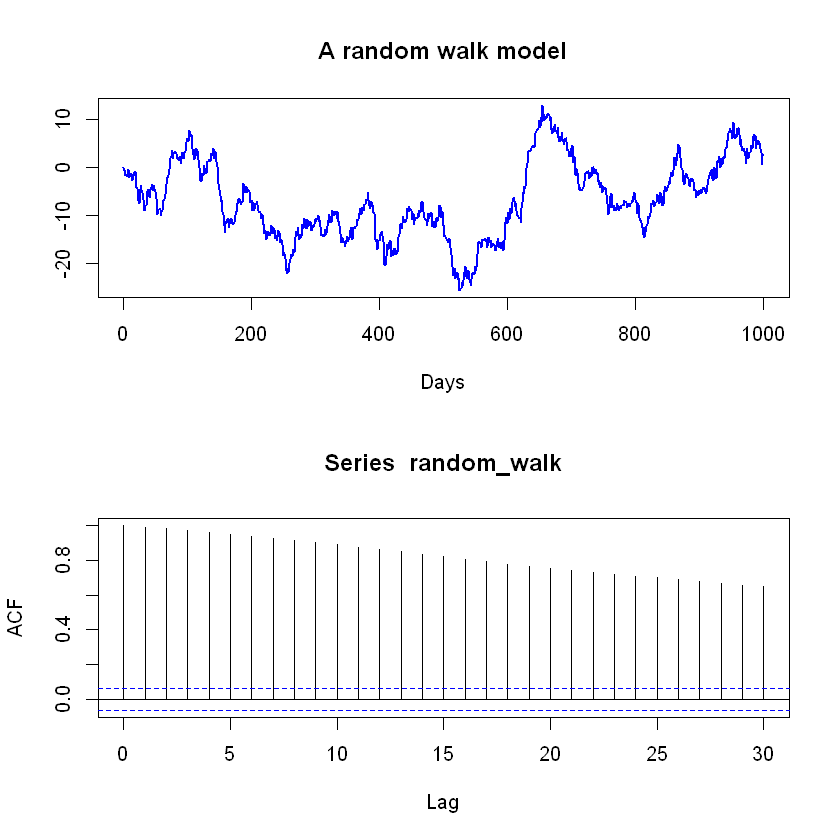

In [9]:
par(mfrow= c(2,1))
plot (random_walk, main = "A random walk model", xlab ='Days', ylab = ' ', col = 'blue', lwd =2)
acf(random_walk)

### Removing the Trend

We used to find the ACFs of stationary time series. Despite the random walk being a non-stationary model, we plotted the ACF and it seems that there is a heavy correlation at successive lags.

**Differencing** can help us remove the trend

By rearranging the terms in the random walk model, <br>
$X_t - X_{t-1} = Z_t$ <br>
Thus $\Delta X_t = Z_t$, which is a purely random process and thus a **stationary process**

We can plot the same and check the ACF again
### Plotting the Random walk after differencing

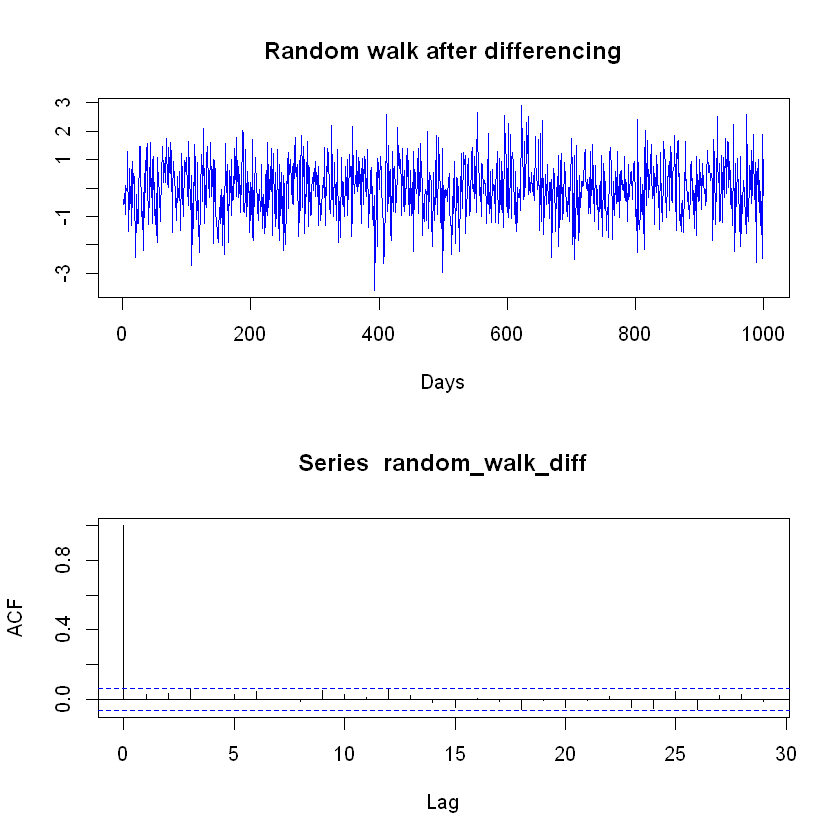

In [17]:
par(mfrow=c(2,1))
# it gives another timeseries with the differences
random_walk_diff = diff(random_walk)  ## diff gives difference with lag 1
plot(random_walk_diff, main = "Random walk after differencing", xlab ='Days', ylab = ' ', col = 'blue')
acf(random_walk_diff)

<h2><center>4 Moving Averages</center></h2>
___

### Intuition
- Let's say $X_t$ is the stock price of a company. And each daily announcement of the company is modeled as a noise. <br>
- Effect of the daily announcements(noises $Z_t$) on the stock price($X_t$) might last few days(2 days in this case)<br>
- So, stock price can be modeled as a linear combination of noises that affect it<br>

**$X_t = Z_t+ \theta_1 Z_{t-1}+ \theta_2 Z_{t-2}$** <br>
where $Z_i$ are iid and normal distributions

So the effect of noise from last 2 days is impacting current stock price with weights $\theta_1$ and $\theta_2$. And this is a **MA2 model** and similar would be a MA(q) model.

### Generating and Plotting a MA(2) model

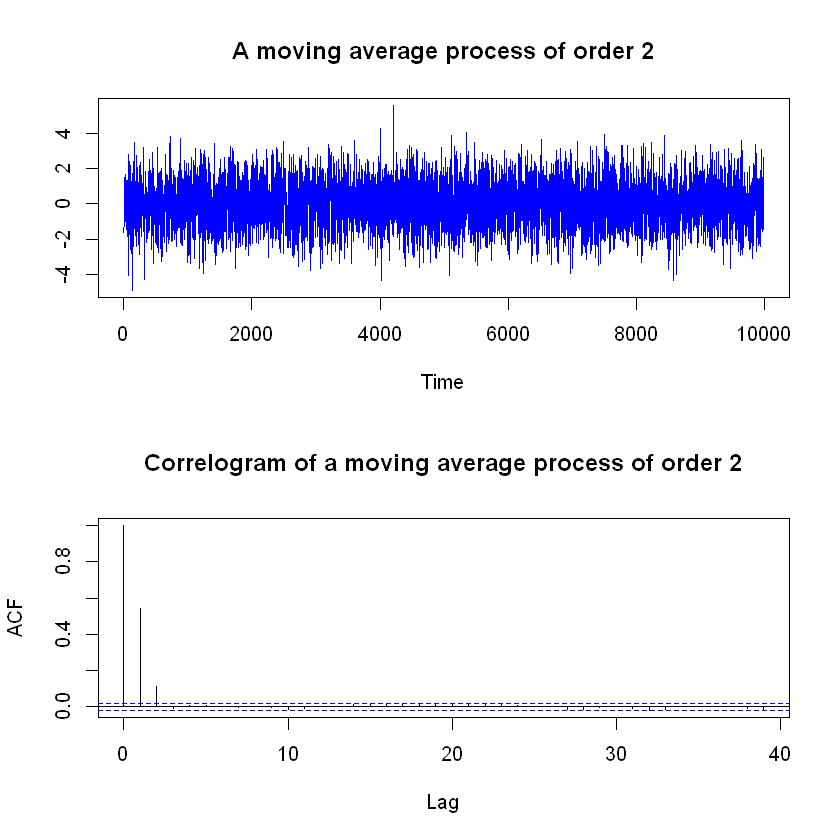

In [19]:
# Generate noise
noise=rnorm(10000)

# Introduce a variable
ma_2=NULL

# Loop for generating MA(2) process
# As it is an MA(2) process, we start the range from 3.

for(i in 3:10000){
    ma_2[i]=noise[i]+0.7*noise[i-1]+0.2*noise[i-2]
}

# Shift data to left by 2 units
moving_average_process=ma_2[3:10000]

# Put time series structure on a vanilla data
moving_average_process=ts(moving_average_process)

# Partition output graphics as a multi frame of 2 rows and 1 column
par(mfrow=c(2,1))

# plot the process and plot its ACF
plot(moving_average_process, main='A moving average process of order 2', ylab=' ', col='blue')
acf(moving_average_process, main='Correlogram of a moving average process of order 2')


We can see that the correlogram plot **cuts off** after a lag of **2** suggesting that it is a MA2 process.